# Laptop Comparison Between Walmart and Bestbuy
Jieyun Wang/Shan Gao/Xi Yang/Yuxiang Lin
## 1 Introduction
Nowadays the demand of laptops is rising, which laptop should you buy has been a question without a clear obvious answer. There are simply too many different types of laptops with various brands, screen size, storage capacity and other pamrameters to choose from. More to the point, there is no single best laptop because there is no single kind of laptop user.
 
To help customer find a suitable laptops, we collcect around 1000 laptops informations and dig into the data. We want to help customer find some key informations that are useful when they are diciding what kind of brand and which laptops should they choose and make right decision. We also aim to solve questions like 'how much does a customer need to spend if he would like to buy a laptop with an extra 64G storage capacity?' through the result of regression. In addition, we give corresponding product recommendation based on the clustering result of laptops. 

## 2 Analysis Plan
* Using EDA and linear regression model to determine the key factors that affect the price of a laptop and try to predict the price given laptop specifications
* Using data visualization to compare the price of same product between Walmart and Bestbuy. The same product is defined by having same model number. 
* Using unsupervised learning method, in this case clustering to form groups of similar products. 

## 3 Data Extraction
We scraped both Bestbuy and Walmart website for laptop informations. Since the both of them only gives about 1000 entries, there is no need to use database. We simply saved the data in csv files to avoid scraping from the beginning each time we run the code. 

In [1]:
import pandas as pd
import numpy as np
import string
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
%run ../code/bestbuy.py

In [ ]:
%run ../code/walmart.py

For the laptop of Walmart, we have the following variables:

In [2]:
walmart = pd.read_csv('../data/walmart.csv')
walmart.columns

Index(['Unnamed: 0', 'title', 'brand', 'model', 'price', 'rating',
       'review_num', 'operating_system', 'battery_life', 'screen_size',
       'dimensions', 'Hard_Drive_Capacity', 'Processor Type',
       'Processor Speed', 'RAM Memory'],
      dtype='object')

Bestbuy provides more specifications on the laptop, thus apart from price and model which we might need for later comparison with Walmart price, more variables were obtained. All variables are listed below. 

In [3]:
bestbuy = pd.read_csv('../data/Bestbuy.csv')
bestbuy.columns

Index(['index', 'title', 'price', 'category', 'color', 'review rating',
       'review number', 'model', 'Screen Size', 'Touch Screen', 'Storage Type',
       'Total Storage Capacity', 'Hard Drive Capacity', 'System Memory (RAM)',
       'Processor Speed (Base)', 'Processor Model', 'Operating System',
       'Battery Life', 'Brand', 'Product Height', 'Product Width',
       'Product Depth', 'Product Weight'],
      dtype='object')

To start with, we have 1370 items scraped from Bestbuy and 1480 items scraped from Walmart. 

One major problem with the raw data is that, some of the categorical variables have too many levels. Take the laptop color we scrape from Bestbuy as an example: there are 168 different discriptions of color, 44 of which contain the color 'Black', including 'Obsidian Black', 'Jet Black'... As far as we concern, we could just categorize them into several common color group, like 'Black','Gray','Silver... We did the similar category with the following variables: Color, Operating System and Processor Model. 

Another problem we should deal with is the unit. For Hard Drive Capacity, some of them are labeled with terabytes and the rest are labeld with gigabytes. What we apply is that we transform them into the same unit and then just keep the number, so that we could have the proper continoues variables. We did the similar transformation with Total Storage Capacity, Hard Drive Capacity, RAM and Processor Speed.

We also only retain one row of same model number, and get rid of the duplicates. Missing values are not dealt with yet, since some of the missing values might not affect the comparison result in the latter part. They will be dealt with later. 

Finally, we get 1328 items from Bestbuy and 915 items from Walmart.

In [4]:
%run ../code/data_clean.py

In [5]:
# transform the rawdata and set proper data type, for bestbuy data
bestbuy = pd.read_csv('../data/Bestbuy.csv')
bestbuy = B_clean(bestbuy)

In [6]:
# transform the rawdata and set proper data type, for walmart data
walmart = pd.read_csv('../data/Walmart.csv')
walmart = W_clean(walmart)

## 2 Exploratory Descrptive Analysis for Laptop Price

We have 1328 laptop observations come from bestbuy shopping platform. In this part, we analyze the distribution of laptop **price**, **review rating**, **screen size**, **operation** system of laptops for different brands.

1.For the **price** of the laptop, we draw a histogram of the price and compare prices under different brands categories.

2.For **review rating**, we draw grouped boxplots get a brief overview of the rating quantiles under different laptop categories.

3.For **screen size**, we display the stacked barplot to compare the percentage of touchable and untouchable laptop as well as different laptop brands under the same screen size.

4.For **operation system** we display the stacked barplot to compare the percentage of different brands under same operation system.

| Information      | Visualization methods                        |
|------------------|-------------------------------------|
|Price         | Grouped histogram / fitted curve line|
|Review Rating| Grouped boxplot|
|Screen Size            | Stacked barplot         |
|Operation System | Stacked barplot  | 

D:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
D:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


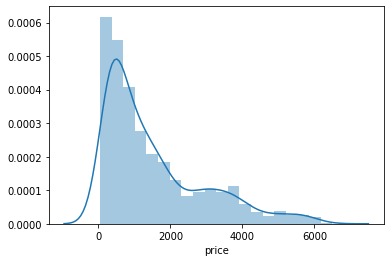

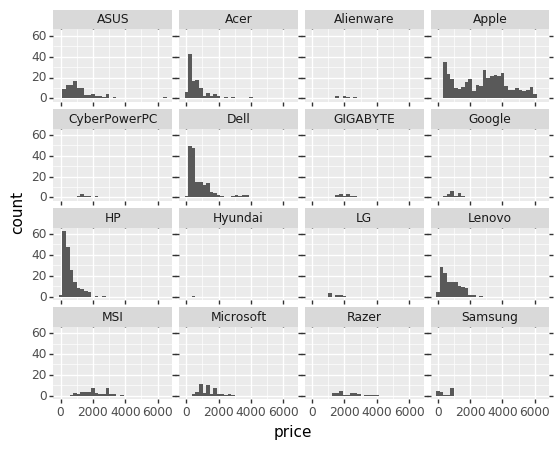

<ggplot: (-9223371877936059865)>

In [7]:
sns.distplot(bestbuy['price'].dropna())
price = p9.ggplot(bestbuy[['price','Brand']].dropna()) + \
p9.geom_histogram(p9.aes(x = 'price'), bins = 30) + p9.facet_wrap('Brand')
price

Most of the laptop prices are distributed among 500-1000$. It is worth noting that the laptops of the **MSI** and **Razer** brands have higher prices than other brands and are mainly focus on high-end laptop marketing, while the **Apple** laptops product covers both cost-effctive and high-end laptop.

D:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
D:\Anaconda\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
D:\Anaconda\lib\site-packages\plotnine\utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
D:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in 

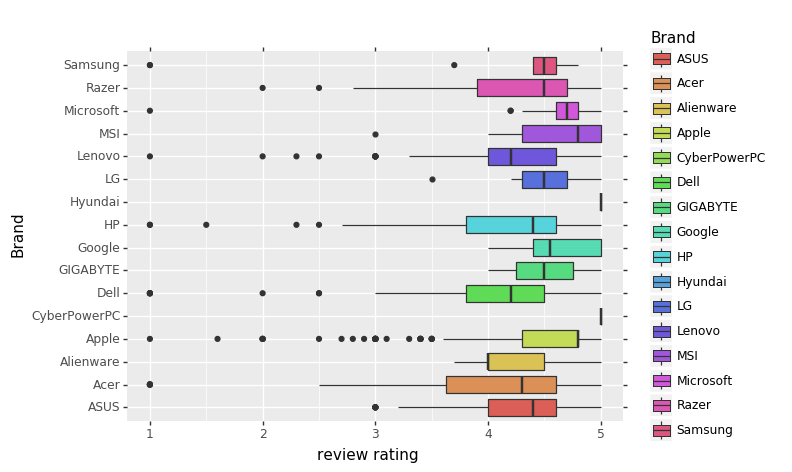

<ggplot: (158918716017)>

In [8]:
rating = p9.ggplot(bestbuy[['review rating','Brand']].dropna()) + \
p9.geom_boxplot(p9.aes(x = 'Brand', y = 'review rating', fill = 'Brand')) + p9.coord_flip()
rating

In general most brands of laptop have a high review rating scores, especially for **Apple**, **MSI**, **Microsoft** and **Google** brand. Notice that **Hyundai** and **CyberPowerPC** have all their laptop products rated 5 points but under these two brands, they all only have one product, so the review rating for these two brands is not reliable.

D:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
D:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


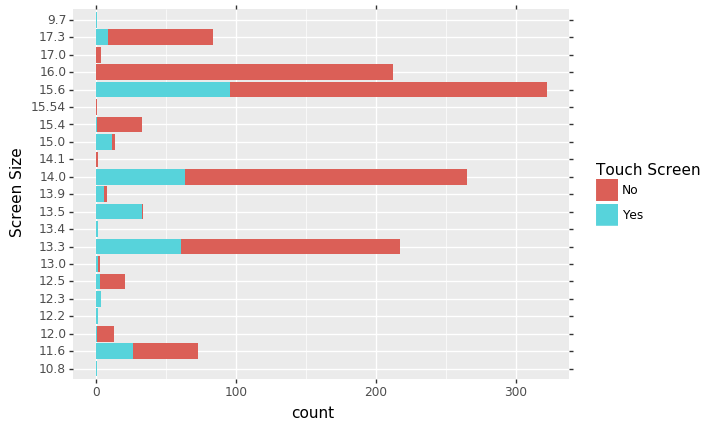

<ggplot: (158918753505)>

In [9]:
Screen_size = p9.ggplot(bestbuy[['Screen Size', 'Touch Screen']].dropna().astype({'Screen Size':'str'})) + \
p9.geom_bar(p9.aes(x = 'Screen Size', fill = 'Touch Screen')) + p9.coord_flip()
Screen_size

The screen size of the laptop ranges from 9.7 to 15.54 inches, we notice that there is a high percentage of the laptops that are not touchable, especially for laptops with 16.0 inches(from the figure above we will find all the laptops with 16.0 inches are **Apple** products and all of the products are **untouchable**).

D:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
D:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


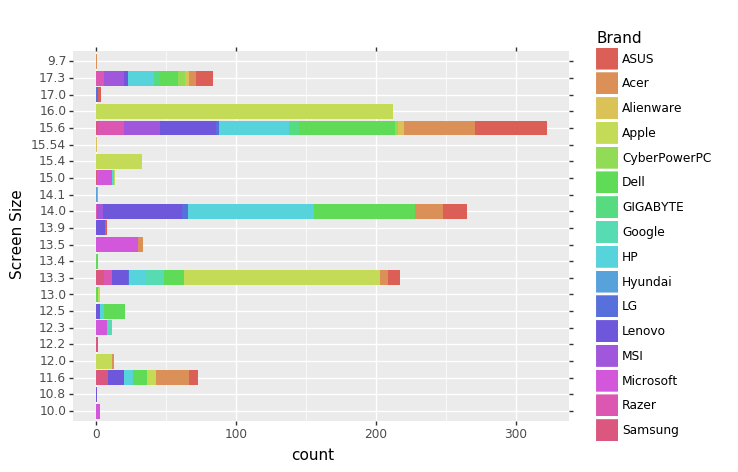

<ggplot: (158920603428)>

In [10]:
Screen_size_1 = p9.ggplot(bestbuy[['Screen Size', 'Brand']].dropna().astype({'Screen Size':'str'})) + \
p9.geom_bar(p9.aes(x = 'Screen Size', fill = 'Brand')) + p9.coord_flip()
Screen_size_1

The common screen size of the laptops are **16.0**, **15.6**, **14.0** and **13.3** inches. All 16.0 inches laptops are **Apple** products.

D:\Anaconda\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
D:\Anaconda\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


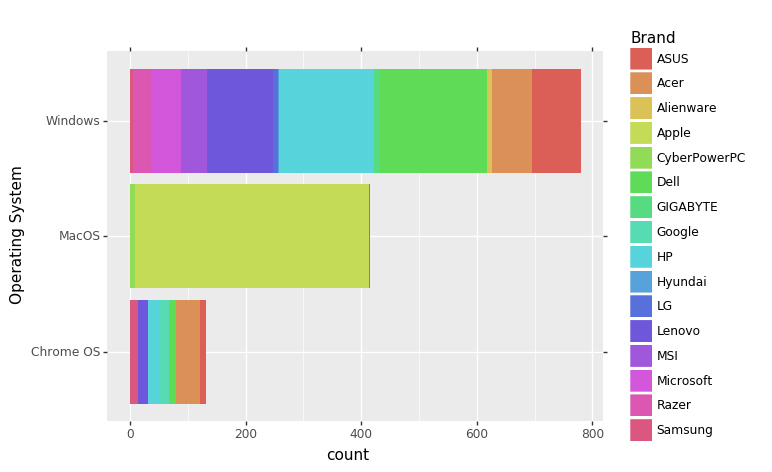

<ggplot: (-9223371877934093070)>

In [11]:
Operating_System = p9.ggplot(bestbuy[['Operating System', 'Brand']].dropna().astype({'Operating System':'str'})) + \
p9.geom_bar(p9.aes(x = 'Operating System', fill = 'Brand')) + p9.coord_flip()
Operating_System

For MacOS system, most of the products come from Apple while the products of the same brand under Windows and Chrome OS do not vary too much.

## 3 Price Prediction in bestbuy laptop

In this part we first take a look at the relationships between the interested and influential variables, then we build the linear regression model to achieve the goal of predicting laptop price. We highlight key informations we find:

1.There exists high **multicollinearity** in our predictors: 
    
    a. Hard Drive Capacity & Storage Drive Capacity
    b. Width, Depth & Weight

2.The influential predictors in pricing prediciton: **Total storage capacity, hard drive capacity, system memory, battery life**.

| Information      | Visualization methods|
|------------------|-------------------------------------|
|Correlation matrix         | seaborn module|
|Linear regression         | statsmodels.formula.api module|

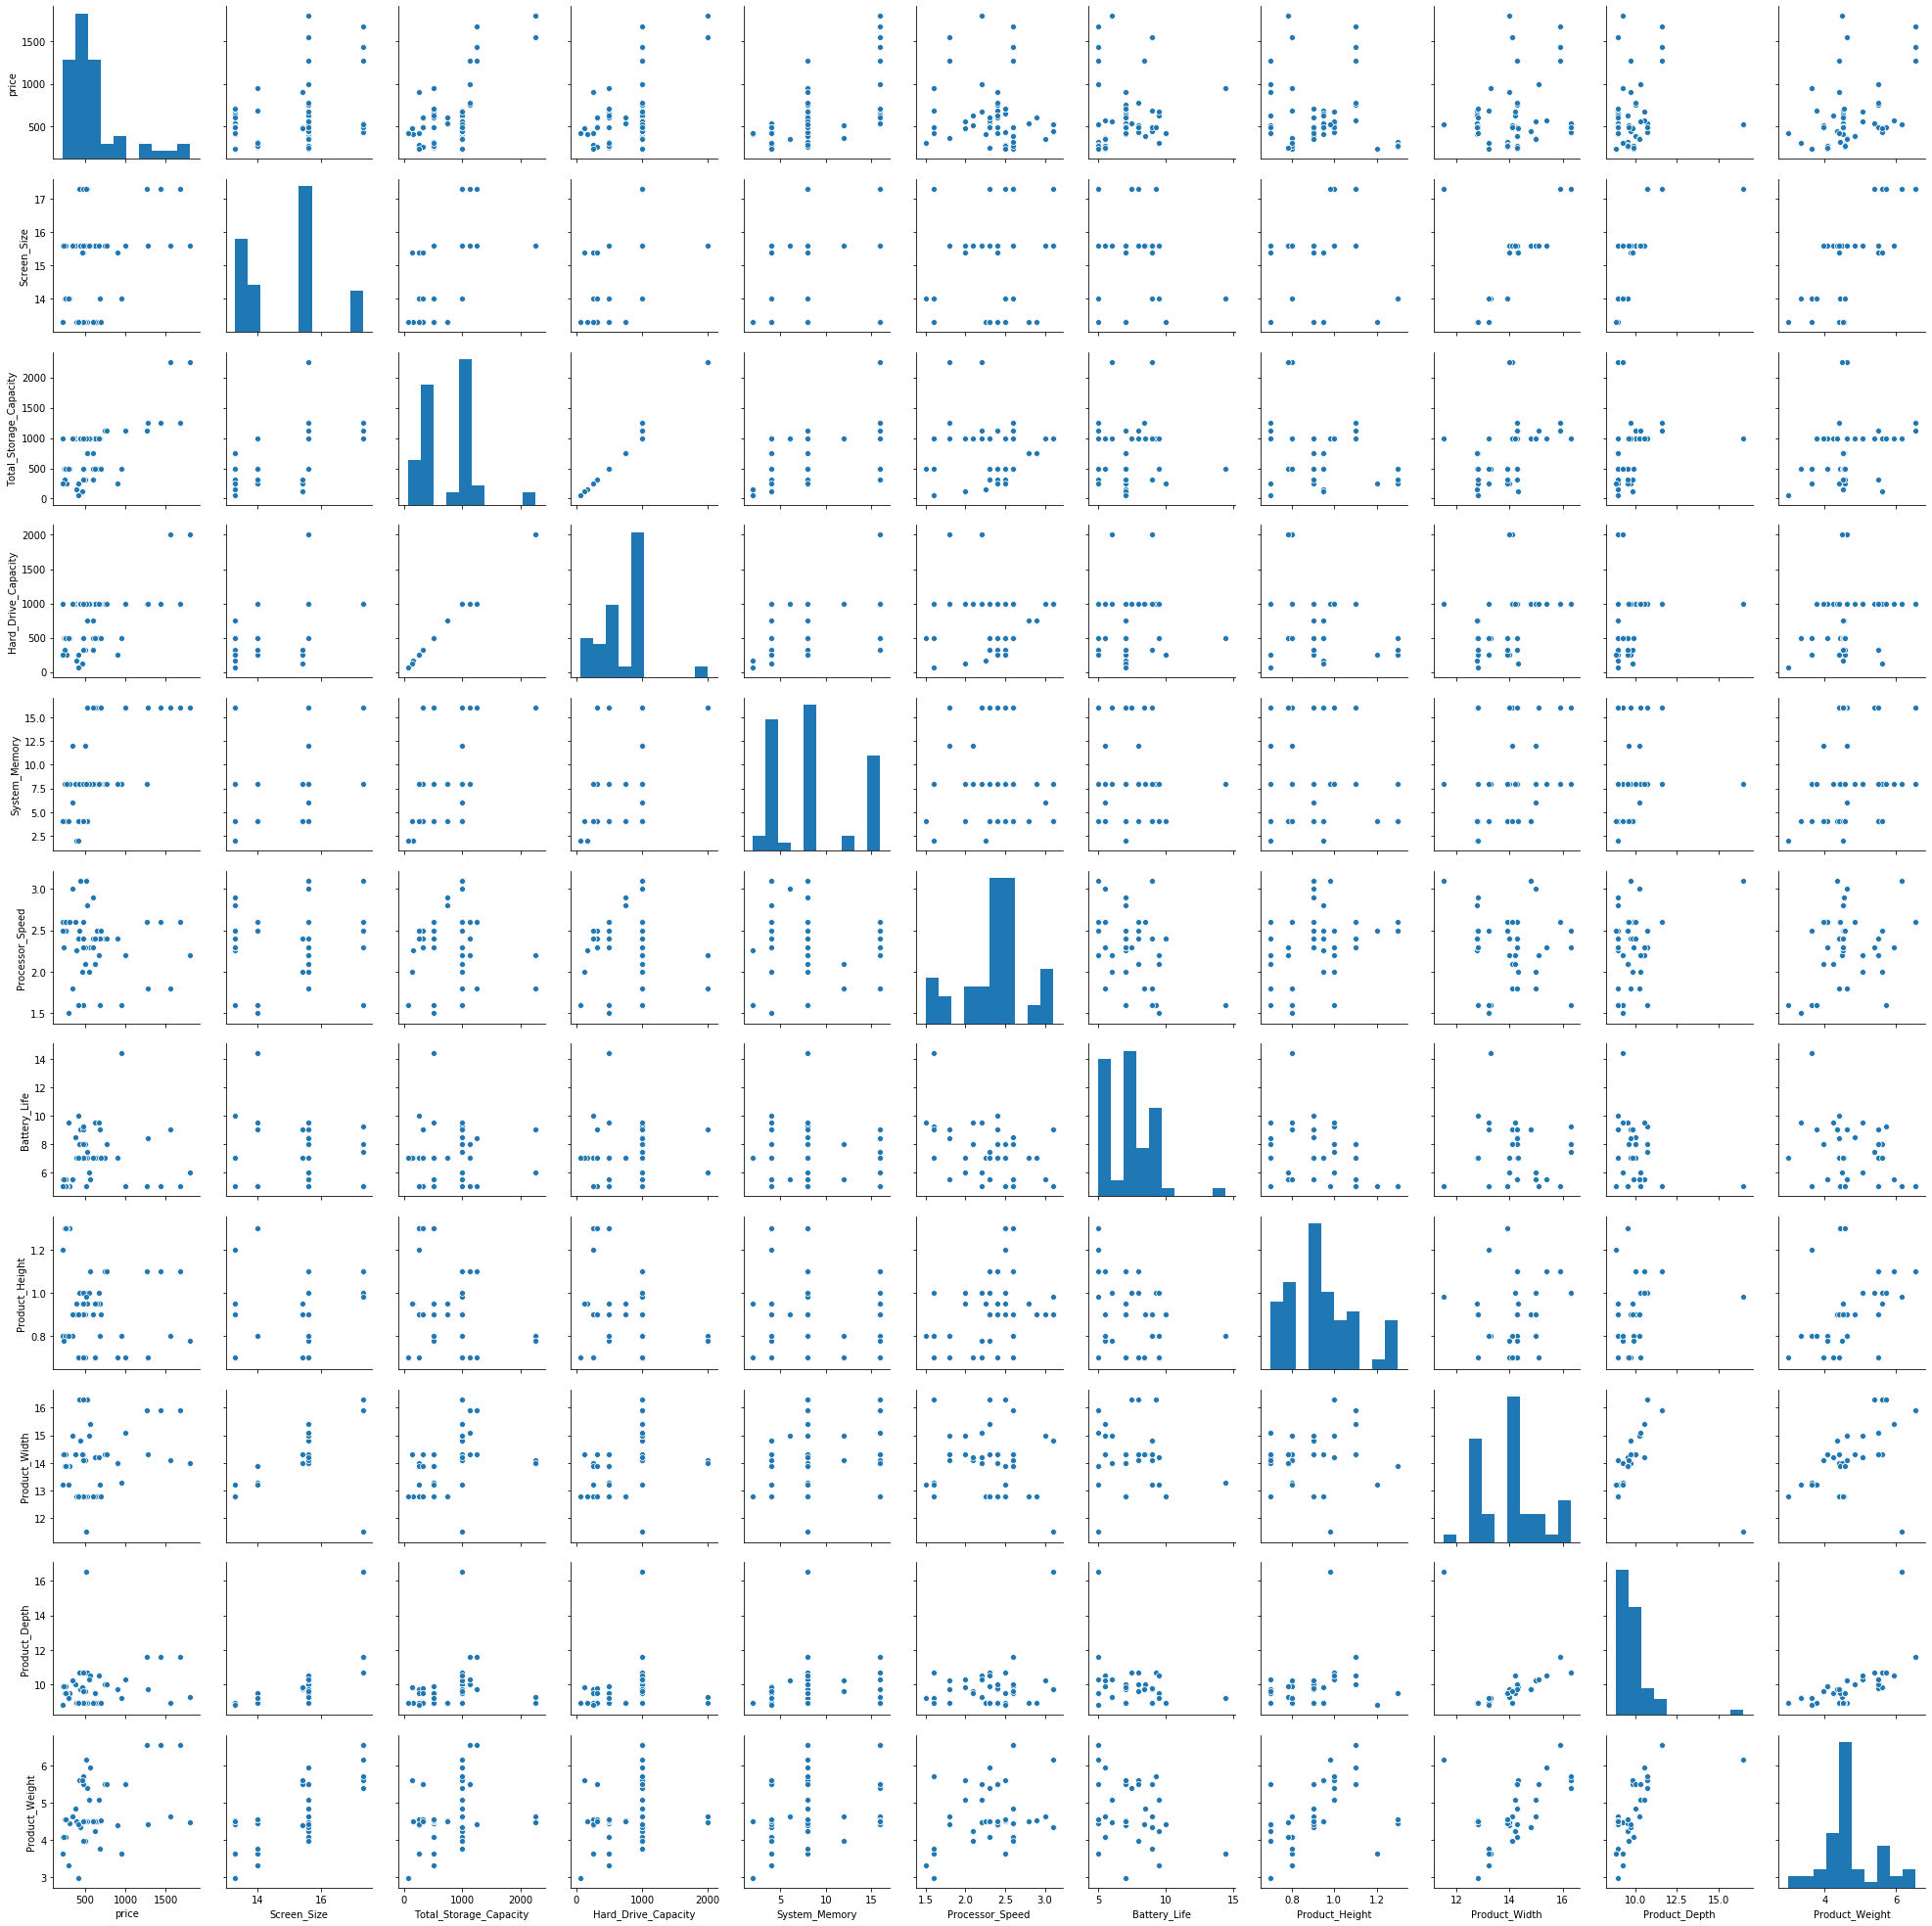

In [13]:
bestbuy_pick = bestbuy[['price', 'Screen Size', 'Touch Screen', 'Storage Type', 'Total Storage Capacity', 'Hard Drive Capacity',
                    'System Memory (RAM)', 'Processor Speed (Base)', 'Operating System', 'Battery Life',
                    'Product Height', 'Product Width', 'Product Depth', 'Product Weight']].dropna()
bestbuy_pick = bestbuy_pick.rename(columns={'Screen Size': 'Screen_Size', 'Touch Screen': 'Touch_Screen', 
                                           'Storage Type': 'Storage_Type', 'Total Storage Capacity': 'Total_Storage_Capacity',
                                           'Hard Drive Capacity': 'Hard_Drive_Capacity', 'System Memory (RAM)': 'System_Memory',
                                           'Processor Speed (Base)': 'Processor_Speed','Operating System': 'Operating_System',
                                           'Battery Life': 'Battery_Life', 'Product Height': 'Product_Height',
                                           'Product Width': 'Product_Width', 'Product Depth': 'Product_Depth',
                                           'Product Weight': 'Product_Weight'})
correlation = sns.pairplot(bestbuy_pick)
correlation

As we can see from the matrix plot, there is a high positive relationship between hard drive capacity an storage drive capacity. In addition, the dimension of the laptop: width, depth, weight are also highly positively related.

In [14]:
reg = smf.ols(formula = 'price~Screen_Size + Touch_Screen + Storage_Type + Total_Storage_Capacity + Hard_Drive_Capacity + \
                         System_Memory + Processor_Speed + Operating_System + Battery_Life + Product_Height + Product_Width + \
                         Product_Depth + Product_Weight', data = bestbuy_pick).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     26.33
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           5.02e-16
Time:                        13:23:59   Log-Likelihood:                -347.05
No. Observations:                  56   AIC:                             722.1
Df Residuals:                      42   BIC:                             750.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -72.7334    694.006     -0.105      0.917   -1473.295    1327.828
Touch_Screen[T.Yes]           -80.2033     82.731     -0.969      0.338    -247.161      86.754
Storage_Type[T.HDD, SSD]      -39.2233    186.728     -0.210      0.835    -416.057     337.610
Operating_System[T.Windows]  -184.2906    126.147     -1.461      0.151    -438.865      70.284
Screen_Size                   -41.4480     78.766     -0.526      0.602    -200.403     117.507
Total_Storage_Capacity          3.7715      0.846      4.458      0.000       2.064       5.479
Hard_Drive_Capacity            -3.6071      0.874     -4.127      0.000      -5.371      -1.843
System_Memory                  13.2250      5.305      2.493      0.017       2.519      23.931
Processor_Speed               -47.4207     62.471     -0.759      0.452    -173.492      78.650
Battery_Life                   35.6914     13.163      2.711      0.010       9.127      62.256
Product_Height               -109.6647    246.457     -0.445      0.659    -607.035     387.706
Product_Width                  32.1872     71.883      0.448      0.657    -112.878     177.253
Product_Depth                  52.8784     67.621      0.782      0.439     -83.587     189.343
Product_Weight                 16.8069     92.239      0.182      0.856    -169.340     202.953
==============================================================================
Omnibus:                       15.020   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.810
Skew:                           1.074   Prob(JB):                     0.000136
Kurtosis:                       4.737   Cond. No.                     4.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are interested in predicting laptop prices when given spcific parameters of a laptop, in other words, we want to know how much does a customer need to spend if he would like to buy a laptop with an extra 64G storage capacity. After building the linear regression, we get our result above:
1. For every one additional hour of battery life, customers need to spend an extra 35.7 dollars.
2. For every one additional gigabytes of total storage capacity, customers need to spend an extra 3.8 dollars.
3. For every one additional gigabytes of total hard drive capacity, customers can save 3.6 dollars.
4. For every one gigabytes of system memory(RAM), customers need to spend an extra 13.2 dollars.

## 4 Compare the price between Walmart and Bestbuy

In [15]:
bestbuy = bestbuy.add_prefix('b_')
walmart = walmart.add_prefix('w_')

In [16]:
walmart['w_model']=walmart['w_model'].str.lower()
bestbuy['b_model']=bestbuy['b_model'].str.lower()
match_data=walmart.set_index('w_model').join(bestbuy.set_index('b_model'), how='inner')
match_data.head()

,w_title,w_brand,w_price,w_rating,w_review_num,w_operating_system,w_battery_life,w_screen_size,w_Hard_Drive_Capacity,w_Processor Type,...,b_System Memory (RAM),b_Processor Speed (Base),b_Processor Model,b_Operating System,b_Battery Life,b_Brand,b_Product Height,b_Product Width,b_Product Depth,b_Product Weight
13-ak0013dx,"HP - Spectre Folio Leather 2-in-1 13.3"" Touch-...",HP,979.00,0.0,0,Windows,18.3,13.3,256.0,Intel Core i7,...,8.0,NaN,Intel Core i7,Windows,15.5,HP,0.60,12.60,9.23,3.24
13-aw0013dx,"HP - Spectre x360 2-in-1 13.3"" Laptop - Intel ...",HP,1299.00,0.0,0,Windows,NaN,NaN,512.0,Intel Core i7,...,8.0,1.3,Intel Core i7,Windows,NaN,HP,0.70,12.00,7.70,2.87
14-cd1075nr,"HP Pavilion x360 Convertible 14-cd1075nr, 14"",...",HP,629.99,5.0,2,Windows,9.0,14.0,1000.0,Intel Core i5,...,8.0,1.6,Intel Core i5,Windows,NaN,HP,0.80,12.70,8.80,3.70
14-da0011dx,"HP - 2-in-1 14"" Touch-Screen Chromebook - Inte...",HP,533.48,0.0,0,Chrome OS,NaN,14.0,NaN,nan,...,8.0,2.2,Intel Core i3,Chrome OS,14.0,HP,0.60,12.80,8.90,3.70
14-dq0011dx,"HP 14"" Touch Screen Widescreen LED-LCD, Intel ...",HP,347.99,0.0,0,Windows,NaN,14.0,128.0,Intel Core i3,...,4.0,2.1,Intel Core i3,Windows,NaN,HP,0.71,12.76,8.86,3.22


In [17]:
full_data=pd.DataFrame()
full_data['title']=walmart['w_title'].append(bestbuy['b_title'],ignore_index=True)
full_data['price']=walmart['w_price'].append(bestbuy['b_price'],ignore_index=True)
full_data['brand']=walmart['w_brand'].append(bestbuy['b_Brand'],ignore_index=True)
full_data['model']=walmart['w_model'].append(bestbuy['b_model'],ignore_index=True)
full_data['web']=pd.DataFrame(np.zeros(len(walmart))).append(pd.DataFrame(np.ones(len(bestbuy))),ignore_index=True)

In [18]:
full_data = full_data.dropna(subset=['price'])

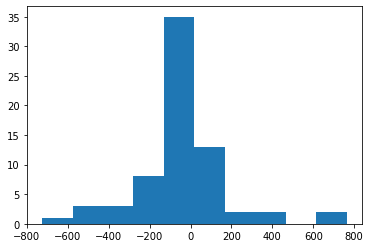

In [19]:
import matplotlib.pyplot as plt
difference=match_data['w_price']-match_data['b_price']
plt.hist(difference.dropna())
plt.show()

## 5 References with Clustering 

Cluster the items with high similarity into one class according to the parameters of the computer. When the user searches for a certain commodity, the e-commerce platform can show similar commodities to the user, thus improving the user's shopping experience.

In [20]:
brand={}
walmart_brand=[]
n=0
for index, row in walmart.iterrows():
    if row[1] in brand:
        walmart_brand.append(brand[row[1]])
        
    else:
        brand[row[1]]=n
        walmart_brand.append(brand[row[1]])
        n+=1

system={}
walmart_system=[]
n=0
for index, row in walmart.iterrows():
    if row[6] in system:
        walmart_system.append(system[row[6]])
        
    else:
        system[row[6]]=n
        walmart_system.append(system[row[6]])
        n+=1

walmart_system

processor={}
walmart_processor=[]
n=0
for index, row in walmart.iterrows():
    if row[10] in processor:
        walmart_processor.append(processor[row[10]])
        
    else:
        processor[row[10]]=n
        walmart_processor.append(processor[row[10]])
        n+=1

walmart_processor

walmart_clustering = pd.DataFrame({'w_brand': walmart_brand,'w_system': walmart_system, 'w_processor': walmart_processor})
walmart_clustering = pd.concat([walmart_clustering,walmart['w_price'],walmart['w_rating'],walmart['w_review_num'],walmart['w_battery_life'],walmart['w_screen_size'],walmart['w_Hard_Drive_Capacity'],walmart['w_Processor Speed'],walmart['w_RAM Memory'],walmart['w_Product Depth'],walmart['w_Product Width'],walmart['w_Product height']], axis=1)
walmart_clustering=walmart_clustering.fillna(-1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


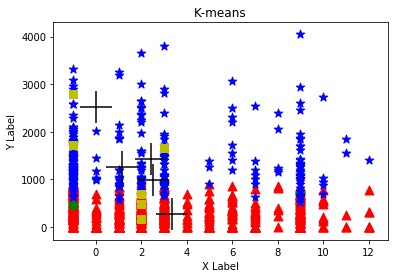

In [21]:
from numpy import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
 
X = walmart_clustering.values[:, 2:]
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))
 
def initCent(dataSet, k):
    data = []
    for i in range(k):
        data.append(dataSet[i].tolist())
    a = array(data)
    centroids = mat(a)
    return centroids

# k-means clustering
def KMeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0] 
    clusterAssment = mat(zeros((m, 2)))
    centroids = initCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): 
            minDist = inf
            minIndex = -1
            for j in range(k): 
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist: 
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2 
        for cent in range(k): # update the center
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] 
            centroids[cent,:] = mean(ptsInClust, axis=0) 
 
    return centroids, clusterAssment
 

def getXY(dataSet):
    import numpy as np
    m = shape(dataSet)[0]  
    X = []
    Y = []
    for i in range(m):
        X.append(dataSet[i,0])
        Y.append(dataSet[i,1])
    return np.array(X), np.array(Y)
 
# data visualization
def showCluster(dataSet, k, clusterAssment, centroids):
    fig = plt.figure()
    plt.title("K-means")
    ax = fig.add_subplot(111)
    data = []
 
    for cent in range(k): 
        ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] 
        data.append(ptsInClust)
 
    for cent, c, marker in zip( range(k), ['r', 'g', 'b', 'y'], ['^', 'o', '*', 's'] ): 
        X, Y = getXY(data[cent])
        ax.scatter(X, Y, s=80, c=c, marker=marker)
 
    centroidsX, centroidsY = getXY(centroids)
    ax.scatter(centroidsX, centroidsY, s=1000, c='black', marker='+', alpha=1)  
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    plt.show()
 

if __name__ == "__main__":
    cluster_Num = 5
    data = X
    centroids, clusterAssment = KMeans(data, cluster_Num)
    showCluster(data, cluster_Num, clusterAssment, centroids)

In [22]:
brand={}
bestbuy_brand=[]
n=0
for index, row in bestbuy.iterrows():
    if row[17] in brand:
        bestbuy_brand.append(brand[row[17]])
        
    else:
        brand[row[17]]=n
        bestbuy_brand.append(brand[row[17]])
        n+=1

system={}
bestbuy_system=[]
n=0
for index, row in bestbuy.iterrows():
    if row[15] in system:
        bestbuy_system.append(system[row[15]])
        
    else:
        system[row[15]]=n
        bestbuy_system.append(system[row[15]])
        n+=1

processor={}
bestbuy_processor=[]
n=0
for index, row in bestbuy.iterrows():
    if row[14] in processor:
        bestbuy_processor.append(processor[row[14]])
        
    else:
        processor[row[14]]=n
        bestbuy_processor.append(processor[row[14]])
        n+=1

processor

touch={}
bestbuy_touch=[]
n=0
for index, row in bestbuy.iterrows():
    if row[8] in touch:
        bestbuy_touch.append(touch[row[8]])
        
    else:
        touch[row[8]]=n
        bestbuy_touch.append(touch[row[8]])
        n+=1
bestbuy_clustering = pd.DataFrame({'b_brand': bestbuy_brand,'b_system': bestbuy_system, 'b_processor': bestbuy_processor,'b_touch':bestbuy_touch})
bestbuy_clustering = pd.concat([bestbuy_clustering,bestbuy['b_price'],bestbuy['b_review rating'],bestbuy['b_review number'],bestbuy['b_Battery Life'],bestbuy['b_Screen Size'],bestbuy['b_Processor Speed (Base)'],bestbuy['b_System Memory (RAM)'],bestbuy['b_Product Depth'],bestbuy['b_Product Width'],bestbuy['b_Product Height'],bestbuy['b_Product Weight']], axis=1)
bestbuy_clustering =bestbuy_clustering.fillna(-1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


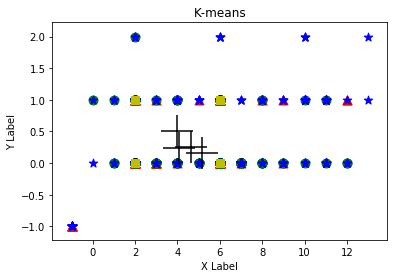

In [25]:
from numpy import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

 
X = bestbuy_clustering.values[:, 2:]
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))
 
def initCent(dataSet, k):
    data = []
    for i in range(k):
        data.append(dataSet[i].tolist())
    a = array(data)
    centroids = mat(a)
    return centroids

def KMeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0] 
    clusterAssment = mat(zeros((m, 2)))
    centroids = initCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): 
            minDist = inf
            minIndex = -1
            for j in range(k): 
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist: 
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2 
        for cent in range(k): 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] 
            centroids[cent,:] = mean(ptsInClust, axis=0) 
 
    return centroids, clusterAssment
 
def getXY(dataSet):
    import numpy as np
    m = shape(dataSet)[0] 
    X = []
    Y = []
    for i in range(m):
        X.append(dataSet[i,0])
        Y.append(dataSet[i,1])
    return np.array(X), np.array(Y)

def showCluster(dataSet, k, clusterAssment, centroids):
    fig = plt.figure()
    plt.title("K-means")
    ax = fig.add_subplot(111)
    data = []
 
    for cent in range(k): 
        ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
        data.append(ptsInClust)
 
    for cent, c, marker in zip( range(k), ['r', 'g', 'b', 'y'], ['^', 'o', '*', 's'] ): 
        X, Y = getXY(data[cent])
        ax.scatter(X, Y, s=80, c=c, marker=marker)
 
    centroidsX, centroidsY = getXY(centroids)
    ax.scatter(centroidsX, centroidsY, s=1000, c='black', marker='+', alpha=1) 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    plt.show()
 

if __name__ == "__main__":
    cluster_Num = 5
    data = X
    centroids, clusterAssment = KMeans(data, cluster_Num)
    showCluster(data, cluster_Num, clusterAssment, centroids)

Filter to see that the clustering result is type3, and select the first three to search on the corresponding website, the things found are almost similar commodities, indicating that the clustering result is fine.